# Problem Statement

Company XYZ is an online grocery store that wants to improve its marketing strategies and increase customer engagement and sales. You have been given sample data to analyze. As a business analyst, we are going to analyze the provided marketing dataset and provide insights and recommendations to achieve the following objectives:

### Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#import the dataset
df=pd.read_excel("Online Grocery.xlsx")

In [3]:
df.head()

,Customer_ID,MonthlyIncome,FamilySize,InactiveDays,Amt Fresh Produce,Amt Meat and Seafood,Amt Household Supplies,Amt Health and Wellness,Amt Beverages & Frozen Food,Amt Dairy and Eggs,DiscoutCouponsAvailed,Click_MarketingCmpgn1,Click_MarketingCmpgn2,Click_MarketingCmpgn3,Click_MarketingCmpgn4,Click_MarketingCmpgn5,Complaints,Age,SubscriptionTaken
0,1,342816,1,1,7040,43680,13760,7040,7040,0,3,0,0,0,0,0,6,45,0
1,2,46344,2,19,80,480,160,80,480,526,2,0,0,0,0,0,0,66,1
2,3,71613,5,24,3920,10160,8880,1680,3360,1449,1,0,0,0,0,0,0,55,0
3,4,26646,4,4,320,1600,800,240,400,0,2,0,0,0,0,0,0,36,0
4,5,58293,3,1,3440,9440,3680,2160,1200,1401,5,0,0,0,0,0,0,39,1


### Data Profiling

In [4]:
#dimension of the dataset
print("Rows :", df.shape[0],"\nColumns :",df.shape[1])
print('-------------------------------------------------------------------------------------------------------')

#information about the dataset
print('\nInformation about the dataset\n')
print (df.info())
print('-------------------------------------------------------------------------------------------------------')

#descriptive statistics of the dataset
print('Description about the dataset')
df.describe().T

Rows : 2000 
Columns : 19
-------------------------------------------------------------------------------------------------------

Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Customer_ID                  2000 non-null   int64
 1   MonthlyIncome                2000 non-null   int64
 2   FamilySize                   2000 non-null   int64
 3   InactiveDays                 2000 non-null   int64
 4   Amt Fresh Produce            2000 non-null   int64
 5   Amt Meat and Seafood         2000 non-null   int64
 6   Amt Household Supplies       2000 non-null   int64
 7   Amt Health and Wellness      2000 non-null   int64
 8   Amt Beverages & Frozen Food  2000 non-null   int64
 9   Amt Dairy and Eggs           2000 non-null   int64
 10  DiscoutCouponsAvailed        2000 non-null   int64
 11

,count,mean,std,min,25%,50%,75%,max
Customer_ID,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
MonthlyIncome,2000.0,64179.5015,43730.428983,1730.0,35376.00,51342.0,70677.75,342816.0
FamilySize,2000.0,3.0280,1.417823,1.0,2.00,3.0,4.00,5.0
InactiveDays,2000.0,11.7655,15.231497,1.0,1.00,1.0,20.00,99.0
Amt Fresh Produce,2000.0,2112.0400,3186.886688,0.0,160.00,640.0,2640.00,15920.0
Amt Meat and Seafood,2000.0,13284.6400,17505.303959,0.0,1280.00,5440.0,18800.00,138000.0
Amt Household Supplies,2000.0,3026.9600,4389.141857,0.0,240.00,960.0,4000.00,20720.0
Amt Health and Wellness,2000.0,2200.6400,3331.947918,0.0,80.00,680.0,2720.00,20960.0
Amt Beverages & Frozen Food,2000.0,3491.2800,4095.411256,0.0,720.00,1920.0,4480.00,25680.0
Amt Dairy and Eggs,2000.0,586.2660,914.020408,0.0,0.00,504.0,714.75,6529.0


    There are no null records in the dataset

In [5]:
#display upto 2 decimal place
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**Observation**
1. There are 2000 records of data with 19 features.
2. There are also few outliers in the dataset which need to be taken care.
3. There are no missing value or duplicate records present in the dataset

## 1. Identification of Customer Segment

### 1.1 EDA for Customer Segmentation

#### Distrtibution of Monthly Income

In [6]:
sns.set(style="darkgrid")

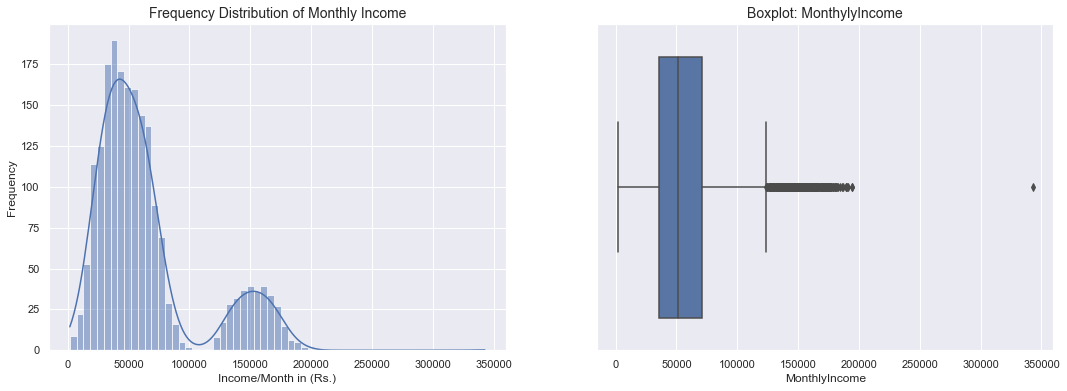

In [7]:
#Monthly income
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title ("Frequency Distribution of Monthly Income", fontsize=14)
plt.ylabel("Frequency")
plt.xlabel("Income/Month in (Rs.)", fontsize=12)
sns.histplot(df.MonthlyIncome, kde=True);

plt.subplot(122)
plt.title("Boxplot: MonthylyIncome", fontsize=14)
sns.boxplot(df.MonthlyIncome);

plt.savefig('monthlyincome_histplot_boxplot.jpg')

    There is an extreme outlier of MonthlyIncome above 300K which can error in accuracy of the analysis. Hence we are going to drop this particular record with such extreme outlier. 
    Also we are going to perform K-Means Clustering which works on euclidean distance, extreme outlier can also cause error in segmentation hence we are going to remove the single outlier

**Ratio of IncomeStatus**

In [8]:
high_income = pd.DataFrame(np.where(df['MonthlyIncome']>100000, '1', '0'))

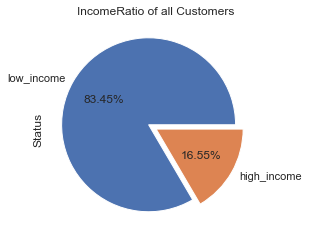

In [9]:
high_income.value_counts().plot(kind='pie', title = 'IncomeRatio of all Customers', 
                                              labels=['low_income','high_income'], 
                                              explode=(0.1,0), autopct='%.2f%%', ylabel='Status');
plt.savefig('Piechart_MonthlyIncome.jpg')

##### **Outlier Treatment**

In [10]:
index = df[df.MonthlyIncome>300000].index

# dropping the record having such extreme oulier
df.drop(index, axis=0, inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)

df.head()

,Customer_ID,MonthlyIncome,FamilySize,InactiveDays,Amt Fresh Produce,Amt Meat and Seafood,Amt Household Supplies,Amt Health and Wellness,Amt Beverages & Frozen Food,Amt Dairy and Eggs,DiscoutCouponsAvailed,Click_MarketingCmpgn1,Click_MarketingCmpgn2,Click_MarketingCmpgn3,Click_MarketingCmpgn4,Click_MarketingCmpgn5,Complaints,Age,SubscriptionTaken
0,2,46344,2,19,80,480,160,80,480,526,2,0,0,0,0,0,0,66,1
1,3,71613,5,24,3920,10160,8880,1680,3360,1449,1,0,0,0,0,0,0,55,0
2,4,26646,4,4,320,1600,800,240,400,0,2,0,0,0,0,0,0,36,0
3,5,58293,3,1,3440,9440,3680,2160,1200,1401,5,0,0,0,0,0,0,39,1
4,6,62513,3,1,3360,7840,0,3360,1120,0,2,0,0,0,0,0,0,53,0


#### Distribution of FamilySize

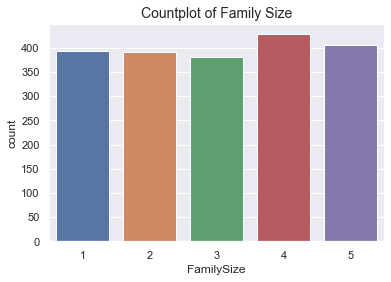

In [11]:
#Family Size
plt.title ("Countplot of Family Size", fontsize=14)

sns.countplot(df.FamilySize);
# value_counts
df.FamilySize.value_counts()

plt.savefig('FamilySizeCountplot.jpg')

##### **Is there any co relation between Monthly Income & Family Size ?**

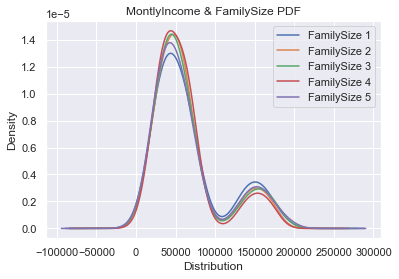

In [12]:
df.MonthlyIncome[df.FamilySize==1].plot(kind='kde')
df.MonthlyIncome[df.FamilySize==2].plot(kind='kde')
df.MonthlyIncome[df.FamilySize==3].plot(kind='kde')
df.MonthlyIncome[df.FamilySize==4].plot(kind='kde')
df.MonthlyIncome[df.FamilySize==5].plot(kind='kde')
plt.title("MontlyIncome & FamilySize PDF")
plt.xlabel("Distribution")
plt.legend(['FamilySize 1','FamilySize 2','FamilySize 3','FamilySize 4','FamilySize 5'])

plt.savefig('Familysize_Income.jpg')

In [13]:
#monthly income of the families according to their size
family_income = df.groupby('FamilySize')['MonthlyIncome'].mean()
family_income

FamilySize
1   66897.85
2   63263.20
3   64148.45
4   61109.03
5   65007.87
Name: MonthlyIncome, dtype: float64

#### Distribution of Inactive Days

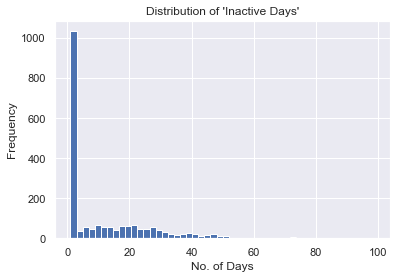

In [14]:
#Inactive Days
df.InactiveDays.plot(kind='hist', bins=50);
plt.title("Distribution of 'Inactive Days'")
plt.xlabel("No. of Days")
plt.savefig('InactiveDays_histplot.jpg')

#### Distribution Plot of Age

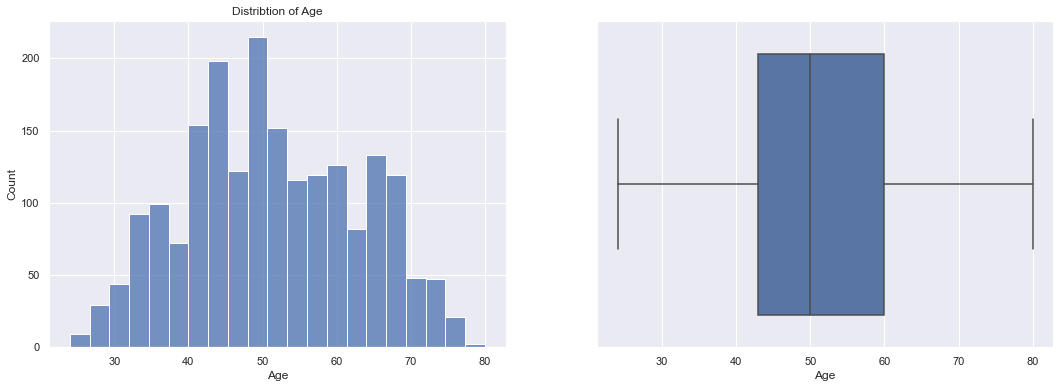

In [15]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.histplot(df.Age);
plt.title("Distribtion of Age")
plt.xlabel("Age")

plt.subplot(122)
sns.boxplot(df.Age);

plt.savefig('age_hist_boxplot.jpg')

##### **Is there any co relation between the Age and InactiveDays ??**

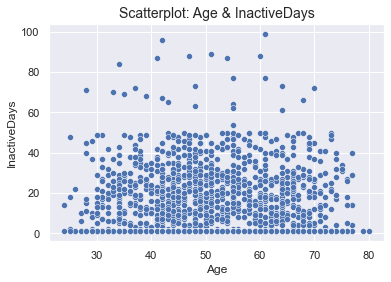

In [16]:
plt.title("Scatterplot: Age & InactiveDays", fontsize=14)
sns.scatterplot(data=df, x='Age', y='InactiveDays');
plt.savefig('Age_inactiveity.jpg')

##### **Is there any kind of pattern between Age and MonthlyIncome ??**

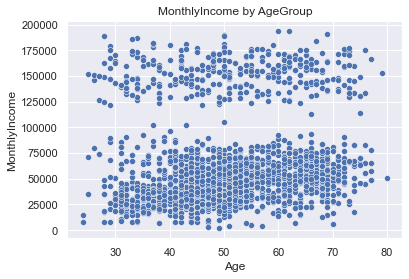

In [17]:
sns.scatterplot(data=df, x='Age', y='MonthlyIncome');
plt.title('MonthlyIncome by AgeGroup')
plt.savefig('Income_Age.jpg')

#### **Observation**
- The distribution of **`MonthlyIncome`** is *'Bimodal'*. Hence its clearly indicates that there are two categories of people with Purchasing power.
    * People with **average monthly income of 50k** have less purchasing power
    * Another category of peole with **avg. monthly income of 150K** can have high purchasing power
- There is one **extreme outlier(above 3L)** which have been eliminated for predicting segments of groups
    
- The Distribution of the **`FamilySize`** is Normal.

- There is no strong pattern between MonthlyIncome of the Family and size of the Family which can be clearly interpretated from the overlapping density plot of MonthlyIncome with diferrent family size.

- More than 50% of the Customers are active (1000 approx) which is a good indicator to segment **`Active`** & **`Inactive`** Customers. 
- The distribution of the Age is *'Multimodal'* and no outlier is present in the dataset.
    * Most of the Inactive customers are above 45 years of Age.
    
*Note - These are Preliminary insight to gain a visual understanding of the Dataset. We are going to perform Clustering Analysis using K-Means Clustering Algorithm*

### 1.2 K-Means Clustering

#### 1.2.1 Feature Engineering for evaluating Clusters

In [18]:
# list of the columns having 'Amt'
amt_cols = [k for k in df.columns if 'Amt' in k]
print('Columns with Amount expenses are:', amt_cols)

# initializing a seperate column Total Amount which is a summation of all the Amt Columns to give the Total Spending of the Customer
df['TotalAmt']=0

# summation of the Columns with 'Amt'
df['TotalAmt']=df[amt_cols].sum(axis=1)

Columns with Amount expenses are: ['Amt Fresh Produce', 'Amt Meat and Seafood', 'Amt Household Supplies', 'Amt Health and Wellness', 'Amt Beverages & Frozen Food', 'Amt Dairy and Eggs']


In [19]:
df

,Customer_ID,MonthlyIncome,FamilySize,InactiveDays,Amt Fresh Produce,Amt Meat and Seafood,Amt Household Supplies,Amt Health and Wellness,Amt Beverages & Frozen Food,Amt Dairy and Eggs,DiscoutCouponsAvailed,Click_MarketingCmpgn1,Click_MarketingCmpgn2,Click_MarketingCmpgn3,Click_MarketingCmpgn4,Click_MarketingCmpgn5,Complaints,Age,SubscriptionTaken,TotalAmt
0,2,46344,2,19,80,480,160,80,480,526,2,0,0,0,0,0,0,66,1,1806
1,3,71613,5,24,3920,10160,8880,1680,3360,1449,1,0,0,0,0,0,0,55,0,29449
2,4,26646,4,4,320,1600,800,240,400,0,2,0,0,0,0,0,0,36,0,3360
3,5,58293,3,1,3440,9440,3680,2160,1200,1401,5,0,0,0,0,0,0,39,1,21321
4,6,62513,3,1,3360,7840,0,3360,1120,0,2,0,0,0,0,0,0,53,0,15680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1996,43815,5,1,800,2320,320,560,1200,696,1,0,0,0,0,0,0,38,0,5896
1995,1997,48195,2,1,2160,5440,4160,560,400,0,6,0,0,0,0,0,0,64,0,12720
1996,1998,77027,5,1,4560,19360,3600,0,880,0,2,0,0,0,0,0,0,68,1,28400
1997,1999,71322,4,21,3440,18080,5520,800,16320,0,2,0,0,0,0,0,0,55,0,44160


In [20]:
# list of columns with 'Click'
col_mark = [k for k in df.columns if 'Click' in k]
print('Columns with Amount expenses are:', col_mark)

# initializing a seperate column of Total Clicks of the Marketing Campaigns which is a summation of all the Click Columns to calculate the responsive rate
df['TotalClick']=0

# summation of the columns with 'Click'
df['TotalClick']=df[col_mark].sum(axis=1)

Columns with Amount expenses are: ['Click_MarketingCmpgn1', 'Click_MarketingCmpgn2', 'Click_MarketingCmpgn3', 'Click_MarketingCmpgn4', 'Click_MarketingCmpgn5']


#### 1.2.2 Model Building

In [24]:
X = df.iloc[:,[1,2,3,17]].values

In [25]:
X

array([[46344,     2,    19,    66],
       [71613,     5,    24,    55],
       [26646,     4,     4,    36],
       ...,
       [77027,     5,     1,    68],
       [71322,     4,    21,    55],
       [32765,     4,    12,    41]], dtype=int64)

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [27]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0.5, 0, 'No. of Clusters')

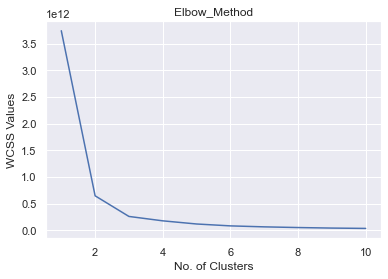

In [28]:
plt.plot(range(1,11), wcss)
plt.title("Elbow_Method")
plt.ylabel("WCSS Values")
plt.xlabel("No. of Clusters")

    We can see that the plot reduces drastically from Cluster 1 to Cluster 2, slows down till 3 and flattens from 4 to 10. 
    We can see that we are getting an elbow at k=3, so we can assign 3 as optimul no. of cluster. 

In [29]:
kmeans_model=KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans_model.fit(X)

KMeans(n_clusters=3, random_state=0)

In [30]:
y_kmeans = kmeans_model.fit_predict(X)

In [31]:
df['Cluster'] = y_kmeans

In [32]:
df.Cluster.value_counts(normalize=True)

2   0.45
1   0.39
0   0.16
Name: Cluster, dtype: float64

In [33]:
df.groupby('Cluster')['MonthlyIncome', 'Age', 'InactiveDays', 'FamilySize'].agg(['mean', 'median'])

MonthlyIncome             Age        InactiveDays        FamilySize  \
                 mean    median  mean median         mean median       mean   
Cluster                                                                       
0           153041.99 152766.00 51.45  51.00        11.44   1.00       2.96   
1            62978.35  61825.00 54.47  55.00        12.77   2.00       3.02   
2            32375.50  33697.00 47.94  47.00        11.02   1.00       3.06   

                
        median  
Cluster         
0         3.00  
1         3.00  
2         3.00

In [34]:
df.columns

Index(['Customer_ID', 'MonthlyIncome', 'FamilySize', 'InactiveDays',
       'Amt Fresh Produce', 'Amt Meat and Seafood', 'Amt Household Supplies',
       'Amt Health and Wellness', 'Amt Beverages & Frozen Food',
       'Amt Dairy and Eggs', 'DiscoutCouponsAvailed', 'Click_MarketingCmpgn1',
       'Click_MarketingCmpgn2', 'Click_MarketingCmpgn3',
       'Click_MarketingCmpgn4', 'Click_MarketingCmpgn5', 'Complaints', 'Age',
       'SubscriptionTaken', 'TotalAmt', 'TotalClick', 'Cluster'],
      dtype='object')

In [35]:
df.groupby('Cluster')['TotalAmt', 'TotalClick', 'DiscoutCouponsAvailed','SubscriptionTaken'].mean()

,TotalAmt,TotalClick,DiscoutCouponsAvailed,SubscriptionTaken
Cluster,,,,
0,73087.92,0.74,1.16,0.46
1,25530.47,0.34,2.78,0.43
2,6200.57,0.10,2.33,0.41


##### **Observation**

1. We have created 3 Segments of Customers based on the parameters of 'MonthlyIncome', 'Age', 'InactiveDays', 'FamilySize'
2. Customers belonging to Cluster 0 are our Prime Customers. 
    * They belong to High class family with High Avg. MonthlyIncome of 150K
    * They also belong to the Age group of 50-51 and are Acitve
    * Since these customers have highest avg salary they also have high purchasing power 
    * Their click_rate is highest of 0.73 which has large margin with other customers from other cluster. 
    * They have the highest subscription_rate of 0.45
    * They are also the ones who have availed least discount coupons
3. We have to put focus on the customers of Cluster 1 to increase the growth of the company.
    * They have good Monthly income but the click_rates are far below when compared to the prime customers. 
    * Increase in click_rate can also increase in subscription
4. Customer from Cluster 2 belong to the category who does not have potential purchasing power and also the click_rates are way beyond other 2 clusters. 

## 2. Product Category Performance

### 2.1 EDA on Product Category Performance

In [36]:
'''for cols in amt_cols:
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    plt.title ([cols], fontsize=14)
    sns.histplot(df[cols], kde=True);
    plt.subplot(122)
    plt.title("Boxplot",fontsize=14)
    sns.boxplot(df[cols]);
'''

'for cols in amt_cols:\n    plt.figure(figsize=(18,6))\n    plt.subplot(121)\n    plt.title ([cols], fontsize=14)\n    sns.histplot(df[cols], kde=True);\n    plt.subplot(122)\n    plt.title("Boxplot",fontsize=14)\n    sns.boxplot(df[cols]);\n'

In [37]:
# list to store the total amount of the sales
amt_total = []
for c in amt_cols:
    amt_total.append(df[c].values.sum())

In [38]:
# dataframe to store Total Sales of all the products
product_category = pd.DataFrame({'Amount':amt_total}, index=amt_cols)
product_category = product_category.sort_values(by='Amount', ascending=False)

In [39]:
product_category

,Amount
Amt Meat and Seafood,26525600
Amt Beverages & Frozen Food,6975520
Amt Household Supplies,6040160
Amt Health and Wellness,4394240
Amt Fresh Produce,4217040
Amt Dairy and Eggs,1172532


In [40]:
product_sales = product_category['Amount']
labels = ['Meat & SeaFood', 'Beverages & Frozen Food', 'HouseholdSupplies', 
          'Health & Wellness', 'Fresh Produce', 'Dairy & Eggs']
exp = (0.05,0,0,0,0,0)

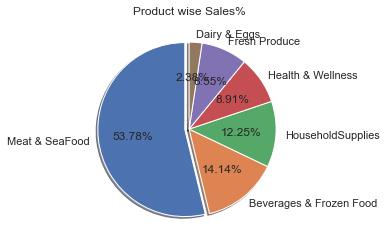

In [41]:
plt.title("Product wise Sales%")
plt.pie(x=product_sales, labels=labels,explode=exp,autopct='%.2f%%',shadow=True, startangle=90);
plt.show()

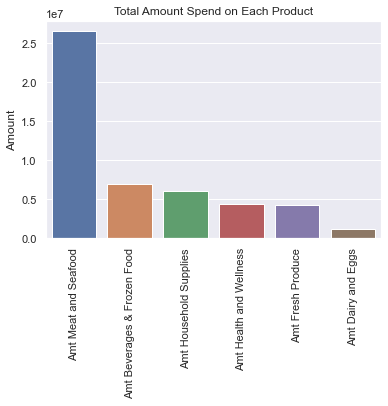

In [42]:
plt.title("Total Amount Spend on Each Product")
ax = sns.barplot(data=product_category, y='Amount', x=product_category.index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

##### **Sales Volume of specific Product Category, clusterwise**

In [43]:
prodt_cat_clus = df.groupby('Cluster')[amt_cols].sum()

In [44]:
prodt_cat_clus

,Amt Fresh Produce,Amt Meat and Seafood,Amt Household Supplies,Amt Health and Wellness,Amt Beverages & Frozen Food,Amt Dairy and Eggs
Cluster,,,,,,
0,1760720,15342240,2557200,1840640,1948080,450870
1,1986640,9058000,2766160,2074640,3557520,445275
2,469680,2125360,716800,478960,1469920,276387


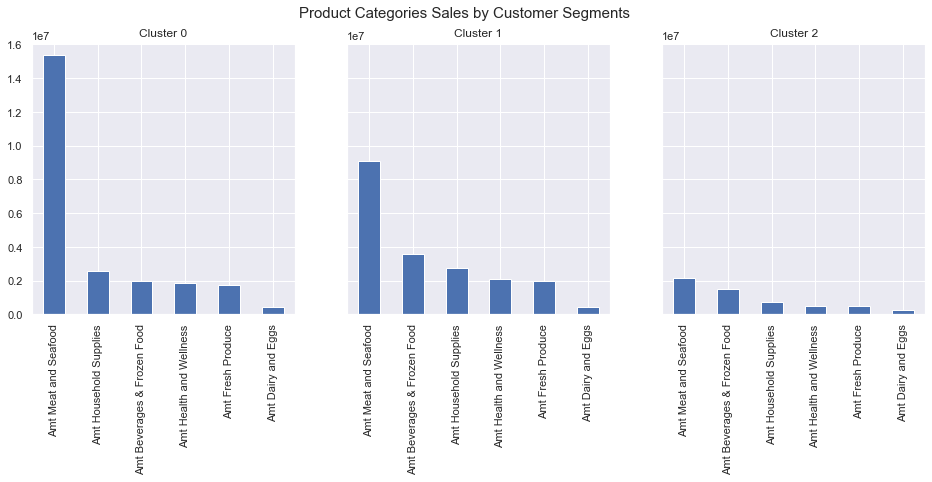

In [45]:
plt.figure(figsize=(16,5))
plt.suptitle("Product Categories Sales by Customer Segments", fontsize=15)
ax1 = plt.subplot(1,3,1)
plt.title('Cluster 0');
prodt_cat_clus.iloc[0,:].sort_values(ascending=False).plot(kind='bar');

ax2 = plt.subplot(1,3,2, sharey=ax1)
plt.title('Cluster 1');
prodt_cat_clus.iloc[1,:].sort_values(ascending=False).plot(kind='bar');

ax2 = plt.subplot(1,3,3, sharey=ax2)
plt.title('Cluster 2');
prodt_cat_clus.iloc[2,:].sort_values(ascending=False).plot(kind='bar');

##### **Avg Sales of specific Product Category, clusterwise**

In [46]:
prodt_cat_clus_avg = df.groupby('Cluster')[amt_cols].mean()

In [47]:
prodt_cat_clus_avg

,Amt Fresh Produce,Amt Meat and Seafood,Amt Household Supplies,Amt Health and Wellness,Amt Beverages & Frozen Food,Amt Dairy and Eggs
Cluster,,,,,,
0,5384.46,46918.17,7820.18,5628.87,5957.43,1378.81
1,2550.24,11627.73,3550.91,2663.21,4566.78,571.60
2,525.96,2380.02,802.69,536.35,1646.05,309.50


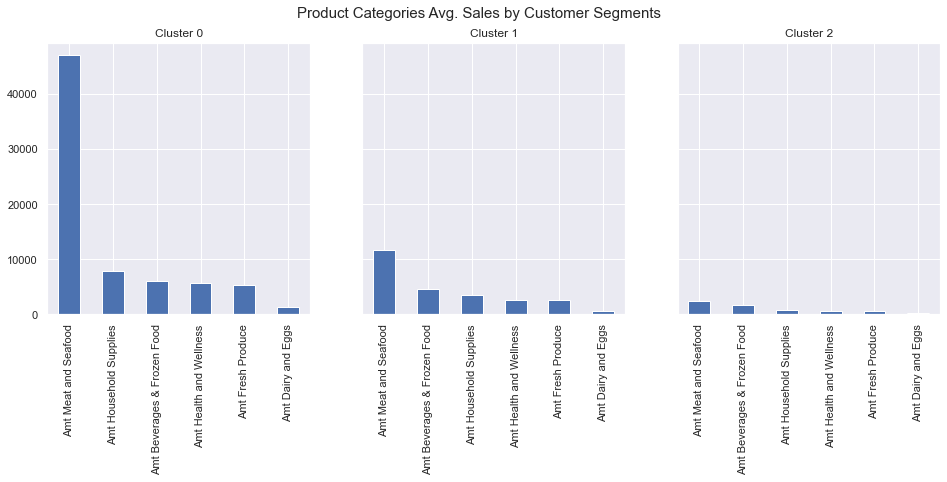

In [48]:
plt.figure(figsize=(16,5))
plt.suptitle("Product Categories Avg. Sales by Customer Segments", fontsize=15)
ax1 = plt.subplot(1,3,1)
plt.title('Cluster 0');
prodt_cat_clus_avg.iloc[0,:].sort_values(ascending=False).plot(kind='bar');

ax2 = plt.subplot(1,3,2, sharey=ax1)
plt.title('Cluster 1');
prodt_cat_clus_avg.iloc[1,:].sort_values(ascending=False).plot(kind='bar');

ax2 = plt.subplot(1,3,3, sharey=ax2)
plt.title('Cluster 2');
prodt_cat_clus_avg.iloc[2,:].sort_values(ascending=False).plot(kind='bar');

In [49]:
# Top 5 customers by Total Sales Volume

In [50]:
amt_cols = [k for k in df.columns if 'Amt' in k]
amt_cols.append('Cluster')

In [51]:
df.groupby('Customer_ID')[amt_cols].sum().sort_values(by='TotalAmt', ascending=False).head(5)

,Amt Fresh Produce,Amt Meat and Seafood,Amt Household Supplies,Amt Health and Wellness,Amt Beverages & Frozen Food,Amt Dairy and Eggs,TotalAmt,Cluster
Customer_ID,,,,,,,,
21,80,138000,80,80,80,2548,140868,1
1240,5040,75680,17520,15120,10080,0,123440,0
344,13040,65440,16960,13040,4880,6441,119801,0
118,10640,76080,13840,0,17280,0,117840,0
440,1920,77920,15760,15520,5120,747,116987,0


In [52]:
# Bottom 5 customers by Total Sales Volume

In [53]:
df.groupby('Customer_ID')[amt_cols].sum().sort_values(by='TotalAmt', ascending=False).tail(5)

,Amt Fresh Produce,Amt Meat and Seafood,Amt Household Supplies,Amt Health and Wellness,Amt Beverages & Frozen Food,Amt Dairy and Eggs,TotalAmt,Cluster
Customer_ID,,,,,,,,
1581,0,320,0,0,0,0,320,1
485,0,320,0,0,0,0,320,1
1749,0,240,0,0,0,0,240,2
711,0,240,0,0,0,0,240,2
62,0,80,0,0,0,0,80,2


#### **Observation**
1. More than 50% of the sales is coming from Product *'Meat&SeaFood'*
2. *'Diary & Eggs'* are not performing up to the mark
3. 'Health' products, 'Beverages' products & Household Supplies product are most popular among 2nd category of Customer

## 3. Evaluation of Marketing Campaigns

### 3.1 Which Campaigns are getting most Clicks?

Text(0, 0.5, 'Total Clicks')

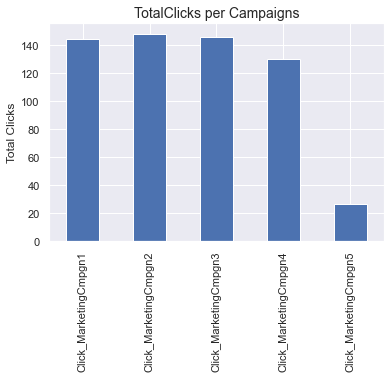

In [54]:
df[col_mark].sum().plot(kind='bar');
plt.title('TotalClicks per Campaigns', fontsize=14)
plt.ylabel('Total Clicks')

        MarketingCampaign5 is not working up to the mark. We need to optimize it or change the strategy

**Does FamilySize is influencing the Clicks of the Campaigns?**

In [55]:
df.groupby('FamilySize')['TotalClick'].sum().sort_values(ascending=False)

FamilySize
5    140
1    121
2    119
4    117
3     97
Name: TotalClick, dtype: int64

    No Strong Pattern noticed with Clicks according to the family Size

### 3.1 Conversion Ratio for Specific Marketing Campaigns

In [56]:
df.Cluster.value_counts()

2    893
1    779
0    327
Name: Cluster, dtype: int64

In [57]:
df_cr1 = pd.DataFrame(df.groupby('Cluster')['Click_MarketingCmpgn1'].value_counts(normalize=True))
df_cr1.rename(columns={'Click_MarketingCmpgn1':'click_rates_campaign1'}, inplace=True)

In [58]:
df_cr2 = pd.DataFrame(df.groupby('Cluster')['Click_MarketingCmpgn2'].value_counts(normalize=True))
df_cr2.rename(columns={'Click_MarketingCmpgn2':'click_rates_campaign2'}, inplace=True)

In [59]:
df_cr3 = pd.DataFrame(df.groupby('Cluster')['Click_MarketingCmpgn3'].value_counts(normalize=True))
df_cr3.rename(columns={'Click_MarketingCmpgn3':'click_rates_campaign3'}, inplace=True)

In [60]:
df_cr4 = pd.DataFrame(df.groupby('Cluster')['Click_MarketingCmpgn4'].value_counts(normalize=True))
df_cr4.rename(columns={'Click_MarketingCmpgn4':'click_rates_campaign4'}, inplace=True)

In [61]:
df_cr5 = pd.DataFrame(df.groupby('Cluster')['Click_MarketingCmpgn5'].value_counts(normalize=True))
df_cr5.rename(columns={'Click_MarketingCmpgn5':'click_rates_campaign5'}, inplace=True)

In [62]:
dfmarket = pd.concat([df_cr1,df_cr2,df_cr3,df_cr4,df_cr5], axis=1)

In [63]:
dfmarket

click_rates_campaign1  click_rates_campaign2  \
Cluster                                                   
0       0                   0.92                   0.88   
        1                   0.08                   0.12   
1       0                   0.95                   0.87   
        1                   0.05                   0.13   
2       0                   0.91                   0.99   
        1                   0.09                   0.01   

           click_rates_campaign3  click_rates_campaign4  click_rates_campaign5  
Cluster                                                                         
0       0                   0.72                   0.76                   0.98  
        1                   0.28                   0.24                   0.02  
1       0                   0.93                   0.94                   0.98  
        1                   0.07                   0.06                   0.02  
2       0                   1.00                   1.00                   1.00  
        1                    NaN                   0.00                   0.00

Text(0, 0.5, 'Click_Rates')

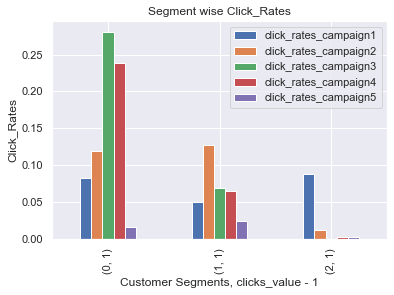

In [64]:
# click rates of the different campaigns can be only efficient when click_through_rate is 1
dfmarket.iloc[[1,3,5]].plot(kind='bar')
plt.title("Segment wise Click_Rates")
plt.xlabel("Customer Segments, clicks_value - 1")
plt.ylabel("Click_Rates")

**Observation**
1. Campaign 3 & 4 got most click rates from Cluster 0 customers, while Campaign 1 is more efficient for Cluster 2

## 4. Customer Retention & Satisfaction

### 4.1 Customer Satisfaction Analysis

**4.1.1 How many customers have complained??**

In [65]:
complain = df[df['Complaints']>0].Complaints.count()
print('There are', complain, 'complains out of 2000 customers')

There are 264 complains out of 2000 customers


**Complain Ratio**

In [66]:
complain/2000

0.132

1     40
9     34
3     30
5     29
8     27
7     27
6     22
10    21
2     19
4     15
Name: Complaints, dtype: int64


Text(0.5, 0, 'No. of times Complain lodged')

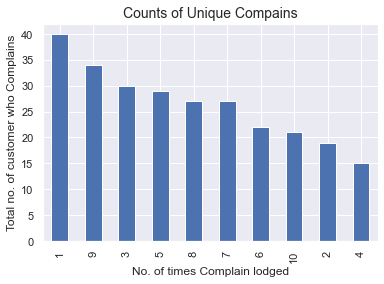

In [67]:
# Complains which are more than 0
unique_complain = df[df['Complaints']>0].Complaints.value_counts()
print(unique_complain)

# plot to view the graph of unique complains
plt.title("Counts of Unique Compains", fontsize=14)
unique_complain.plot(kind='bar')
plt.ylabel('Total no. of customer who Complains')
plt.xlabel("No. of times Complain lodged")

    We have to take special care for the complains more than 5. Further we should look into the customer segment to understand from which segments most of the complains are coming.
    There are almost 34 customer who have complained 9 times, 27 customers who have complained 7 & 8 times, 22 customers who have complained 6 times> These Customers required attention and we should prioritize according to the customer segment

#### **From which customer segment most of the complains are coming?**

In [68]:
df[df['Complaints']>0].groupby('Cluster')['Complaints'].count()

Cluster
0    93
1    78
2    93
Name: Complaints, dtype: int64

    Most of the complains are comming from Cluster segment 0 and 2. But we should look with priority into the complains of cluster segment 0 & 1 since these are our prime customes. Any complaints more than 5 is alarming for the organization. Hence we should look into the pattern of the complains with Customer Segments

Text(13.5, 15, 'Cluster 2')

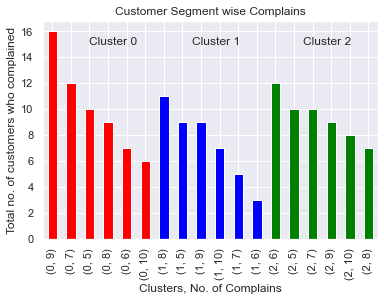

In [69]:
df[df['Complaints']>4].groupby('Cluster')['Complaints'].value_counts().plot(kind='bar', 
                                                                                      color=['red', 'red','red', 'red', 'red', 'red',
                                                                                             'blue','blue','blue','blue','blue','blue',
                                                                                             'green','green','green','green','green', 'green'])
plt.title("Customer Segment wise Complains")
plt.xlabel('Clusters, No. of Complains')
plt.ylabel('Total no. of customers who complained')
plt.text(2, 15, "Cluster 0")
plt.text(7.5, 15, "Cluster 1")
plt.text(13.5, 15, "Cluster 2")

    Highest frequency of Complains are coming from Cluster 0. There are 16 customer from our prime customer segment who have complained 9 times, 12 customers who have complained 7 times and 9 customers who have compained 8 times.We should look into these customers with utmost priority.
    Similar trend is noticed from Customer Segment 1 should be checked with next level priority.
    Customer from Cluster 2 have less high frequency of complains as compared to other 2 cluster.

In [70]:
# dataframe with customer segment 0
df_clus0 = df[df.iloc[:,[0,16,21]].Cluster==0]

In [71]:
# cluster 0 customers complained more than 6 times
print(df_clus0[df_clus0['Complaints']>6].Customer_ID.values)

[  52   56   71   72  265  323  450  527  530  538  570  627  772  801
  826  887  895  947  968 1011 1065 1118 1171 1281 1314 1329 1331 1419
 1428 1449 1504 1560 1624 1634 1647 1718 1814 1825 1862 1928 1965 1967
 1989]


    These are the Customer_ID who are our prime customers and complained 7,8,9 or 10 times. We should approach them to understand their grievance and treat will special discount to gain customer satisfaction built trust.

In [72]:
# dataframe with customer segment 0
df_clus1 = df[df.iloc[:,[0,16,21]].Cluster==1]

In [73]:
# cluster 1 customers complained more than 6 times
print(df_clus1[df_clus1['Complaints']>6].Customer_ID.values)

[  74   82  105  131  165  191  197  263  321  388  402  407  543  684
  803  893  937  981 1003 1247 1311 1466 1473 1480 1617 1644 1694 1809
 1820 1855 1903 1911]


    These are the Customer_ID who are average customers and complained 7,8,9 or 10 times. We should also approach them to understand their grievance and treat will offers or customer support to gain customer satisfaction built trust.

### 4.2 Customer Retention

#### **4.2.1 How many customer's have subsribed?**

In [74]:
subs_taken = df.SubscriptionTaken.value_counts()
subs_taken

0    1145
1     854
Name: SubscriptionTaken, dtype: int64

1. 854 out of 2000 Customers have taken subscription. 
    * We should now focus on measures to increase Customer satisfaction & customize marketing campaign to generate revenue from the premium customers who have taken subscription. 
2. Customer who have not taken the subscription, we should identify the purchasing pattern and resolve the complains. These can further built trust and might get converted into subscribed customers. 

#### **4.2.2 Purchasing Pattern by Subscribed & UnSubscribed Customers**

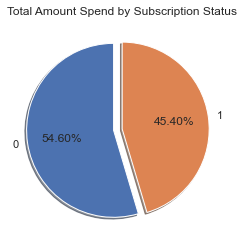

In [75]:
purchase = list(df.groupby('SubscriptionTaken')['TotalAmt'].sum().values)
labels = list(df.groupby('SubscriptionTaken')['TotalAmt'].sum().index)
exp = (0.1, 0)

plt.title("Total Amount Spend by Subscription Status")
plt.pie(x=purchase, labels=labels,explode=exp,autopct='%.2f%%',shadow=True, startangle=90);
plt.show()

    55% of the Revenue is generated from the Unsubscribed Customers while 45% revenue is generated by Subsribed customers

#### **4.2.3 Purchase pattern of speficic Segments of customer by Subscription Status**

In [76]:
pd.crosstab(df.SubscriptionTaken, df.Cluster, values=df.TotalAmt, aggfunc=sum, normalize=True, margins=True)

Cluster,0,1,2,All
SubscriptionTaken,,,,
0,0.26,0.22,0.06,0.55
1,0.22,0.18,0.05,0.45
All,0.48,0.40,0.11,1.00


In [77]:
val = pd.crosstab(df.SubscriptionTaken, df.Cluster, values=df.TotalAmt, aggfunc=sum, normalize=True).values

In [78]:
val = val.flatten()

In [79]:
labels = ['Cluster 0 - NoSub', 'Cluster 1 - NoSub','Cluster 2 - NoSub', 'Cluster 0 - Sub', 'Cluster 1 - Sub','Cluster 2 - Sub']

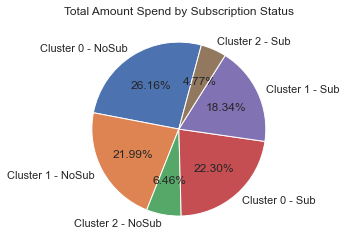

In [80]:
plt.title("Total Amount Spend by Subscription Status")
plt.pie(x=val, labels=labels,autopct='%.2f%%', startangle=75);
plt.show()

    More than 26% of the revenue is generated from the Customer segment of Cluster 0 who have not subscribed. If we can create impression with improvised marketing campaigns to increase the click rate and convert them to Subscribed Customers then we can increase the subscription status which can further result in growth of Revenue.
    Same Strategy could be applied to the customers of Cluster 1 who are non subscriber. ALmost 22% of the Total Revenue is Generated from this category of customers. 

#### **4.2.4 Customer Who are more responsive to the marketing campaigns?**

In [81]:
pd.crosstab(df.SubscriptionTaken, df.Cluster ,values=df.TotalClick, aggfunc=sum, normalize=True, margins=True)

Cluster,0,1,2,All
SubscriptionTaken,,,,
0,0.22,0.27,0.08,0.57
1,0.19,0.17,0.07,0.43
All,0.41,0.44,0.15,1.00


    Customer from Cluster 0 are and have taken the subscription have the highest click rate of 19%
    We should take strategic measures to convert Cluster 0 & cluster 1 segment customers who are non subsriber because they have decent click rate of 22 %

## 5. Revenue Enhancement

### 5.1 Analyzing Spending Pattern

1. I have here examined how customer characterisitics such as MonthlyIncome and FamilySize relate to their spending on different product categories.
2. Calculate average spending for different customer segments based on these characteristics.

**How MonthlyIncome influence the overall spending Pattern?**

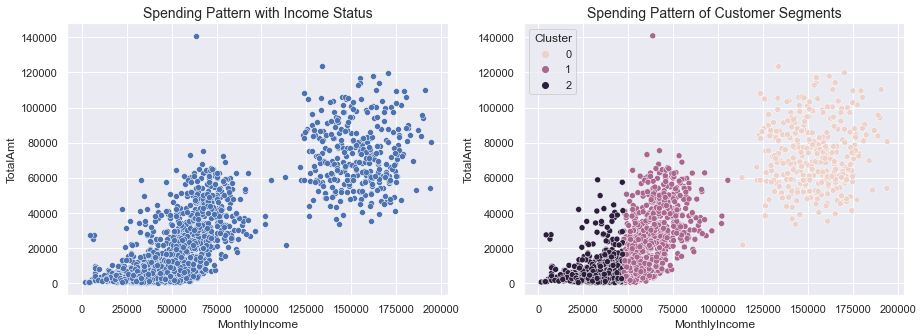

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Spending Pattern with Income Status', fontsize=14)
sns.scatterplot(data=df, x='MonthlyIncome', y='TotalAmt');

plt.subplot(122)
plt.title('Spending Pattern of Customer Segments', fontsize=14)
sns.scatterplot(data=df, x='MonthlyIncome', y='TotalAmt', hue='Cluster');

    Clearly, There are spending pattern increases with increase in MonthlyIncome but the spending habit changes when Customers belongs from Cluster 0 segment who have high average monthly Income.
    We can clearly interpret from the 2nd graph which illustrates the Spending Pattern of the Customer segments. 

Text(0.5, 0, 'MonthlyIncome')

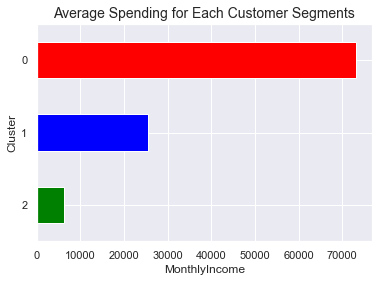

In [83]:
df.groupby('Cluster')['TotalAmt'].mean().sort_values(ascending=True).plot(kind='barh', color=['green','blue', 'red']);
plt.title('Average Spending for Each Customer Segments', fontsize=14)
plt.xlabel('MonthlyIncome')

### 5.2 Identification of High Income Customers

**Top 10 Customers with High Average Income**

In [84]:
high_income_cust = df.groupby('Customer_ID')['MonthlyIncome'].mean().sort_values(ascending=False).head(10)

In [85]:
high_income_cust

Customer_ID
633    194051.00
1968   193926.00
1957   190687.00
108    190058.00
130    189026.00
1434   188957.00
795    186883.00
982    185911.00
1816   184038.00
1696   182416.00
Name: MonthlyIncome, dtype: float64

        These are the top 10 customer who all have high average monthly income. We can provide customised persornal offer and promotions to generate more revenue from them.

In [86]:
df_top = df.copy()

In [87]:
# dataframe containing top 10 customers
top = df_top.iloc[high_income_cust.index]

In [88]:
# taking the product columns for these customers to analyze their average spend on each products
top=top[['Amt Fresh Produce', 'Amt Meat and Seafood','Amt Household Supplies', 
     'Amt Health and Wellness','Amt Beverages & Frozen Food', 
     'Amt Dairy and Eggs',]]

In [89]:
top_mean = top.copy()
top_mean.index=top_mean.index+1
top_mean.loc['Mean']=top_mean.mean()
top_mean

,Amt Fresh Produce,Amt Meat and Seafood,Amt Household Supplies,Amt Health and Wellness,Amt Beverages & Frozen Food,Amt Dairy and Eggs
634,6400.00,17360.00,2320.00,6400.00,880.00,0.00
1969,1680.00,10000.00,4160.00,8080.00,4960.00,831.00
1958,560.00,6480.00,1600.00,0.00,2160.00,707.00
109,400.00,2000.00,0.00,720.00,2400.00,0.00
131,2240.00,60480.00,2880.00,3200.00,10080.00,3747.00
1435,400.00,1680.00,560.00,400.00,800.00,0.00
796,160.00,320.00,160.00,80.00,320.00,529.00
983,960.00,880.00,240.00,1040.00,1200.00,509.00
1817,5280.00,32640.00,2960.00,4560.00,6800.00,0.00
1697,2480.00,44640.00,4960.00,7600.00,6320.00,2644.00


Text(0.5, 0, 'Amount Spend')

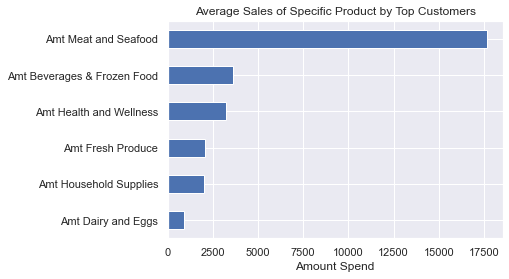

In [90]:
top_mean.loc['Mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Average Sales of Specific Product by Top Customers')
plt.xlabel('Amount Spend')